In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('./hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [2]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset
print('Nr of rows ', num_rows)
print('Nr of columns ', num_cols)

Nr of rows  119390
Nr of columns  32


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Clean and remove unecessary data

In [5]:
# clean data and remove nulls

#replace nan with zero in the children column
df['children'] = df['children'].replace(np.nan, 0)
#convert to integer
df = df.astype({"children":'int'})

# Use the drop() function to remove rows where nr of adults is > 4
df.drop(df.index[df['adults'] > 4], inplace=True)
df['adults'].unique()



array([2, 1, 3, 4, 0], dtype=int64)

In [6]:
df.market_segment.unique()
#We will remove rows with market_segment in ('Complementary', 'Undefined', 'Aviation'),
#because the price is zero or much lower than the actual rate

df.drop(df.index[df['market_segment'] == "Aviation"], inplace=True)
df.drop(df.index[df['market_segment'] == "Complementary"], inplace=True)
df.drop(df.index[df['market_segment'] == "Undefined"], inplace=True)

df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Groups'],
      dtype=object)

### Dataset investigation

C:\Users\dianas\AppData\Local\Temp/ipykernel_18516/1624689633.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax);


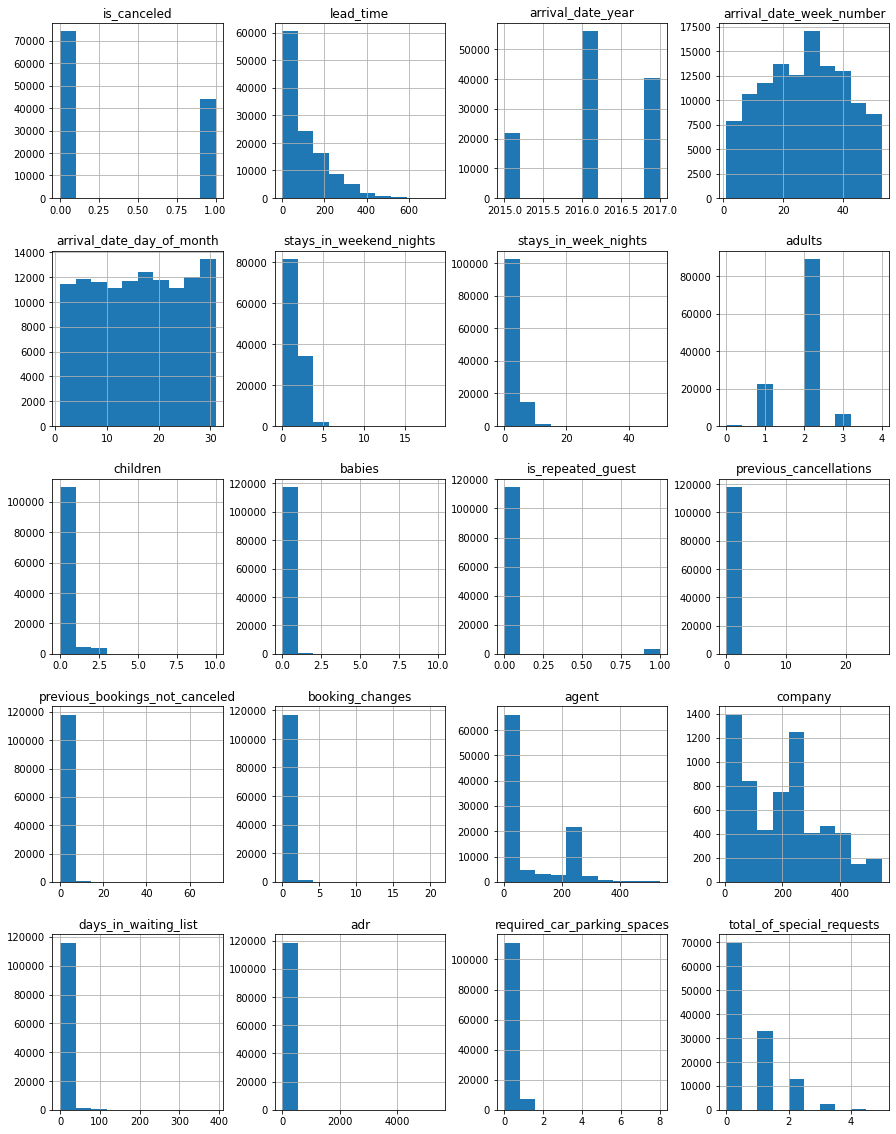

In [7]:
fig = plt.figure(figsize = (15,20));
ax = fig.gca();
df.hist(ax = ax);


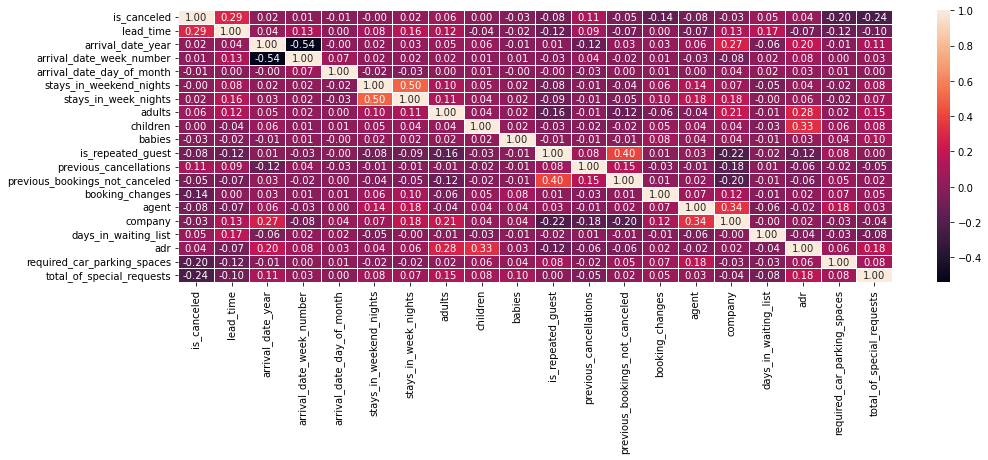

In [8]:
#let' see if we can see any correlation in this dataset
plt.figure(figsize = (16,5))
ax = sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=.5)



 We can observe:
 - some correlation btw price and nr of children and nr of adults, while nr of babies doesn't affect the price
 - some correlation btw price and arrival date of year
 - some correlation btw price and special requests, which makes sense
 - some correlatin btw is_repeated_guest and previous_bookings_not_cancelled, this is expected
 - surprisingly there is no correlation btw families with kids/babies and the need of a car 

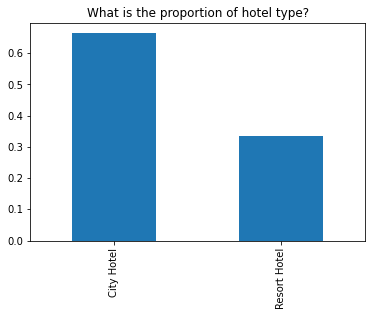

In [9]:
# The proportion of each hotel type
hotel_vals = df.hotel.value_counts()
(hotel_vals/df.shape[0]).plot(kind="bar");
plt.title("What is the proportion of hotel type?");

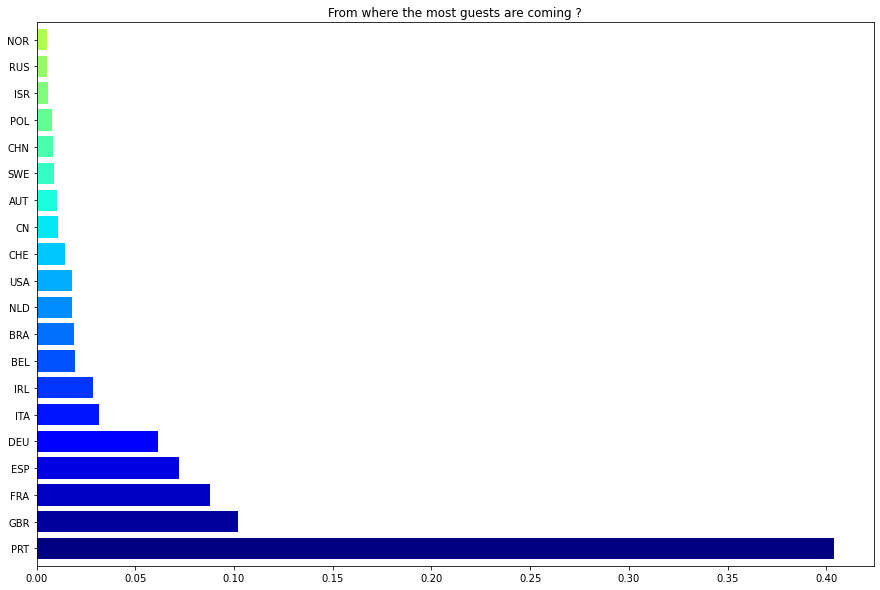

In [10]:
#Which countries are more popular for booking in this dataset
country_vals = df.country.value_counts().head(20)
colors = plt.cm.jet(np.linspace(0, 1, 35))
(country_vals/df.shape[0]).plot(kind='barh',stacked=True, figsize=(15,10),color=colors, width=0.8)

plt.title("From where the most guests are coming ?");

### For which month the bookings are made more in advance

In [11]:
#for which month people book much more in advance
df.groupby('arrival_date_month').mean()['lead_time'].sort_values(ascending=False)

arrival_date_month
September    137.405983
July         136.824253
June         129.459287
October      123.775014
August       121.633396
May          118.752849
April         95.567959
November      77.340835
December      74.334280
March         70.611820
February      48.133891
January       45.764746
Name: lead_time, dtype: float64

 ### Which is the busiest month 

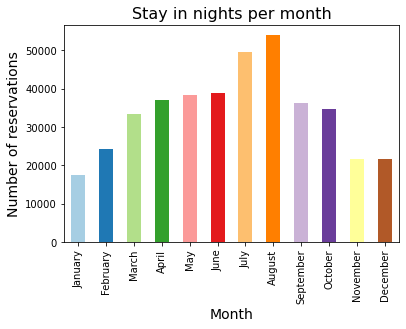

In [12]:

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#let's sum first the number of week nights with number of weekend nights
df['stay_in_nights']=df['stays_in_week_nights']+df['stays_in_weekend_nights']

df_tmp=df.groupby(['arrival_date_month']).sum()['stay_in_nights'].sort_values(ascending=False)
df_tmp = df_tmp.reindex(new_order, axis=0)
df_tmp.plot(kind='bar', stacked=True, color=plt.cm.Paired(np.arange(len(df))));

#add axes labels and a title
plt.ylabel('Number of reservations', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.title('Stay in nights per month', fontsize=16)

#display plot
plt.show()


We can observe that July and August are the busiest months regarding the number of nights to stay
    

### Which is the busiest month per year with and without children

109846
8546


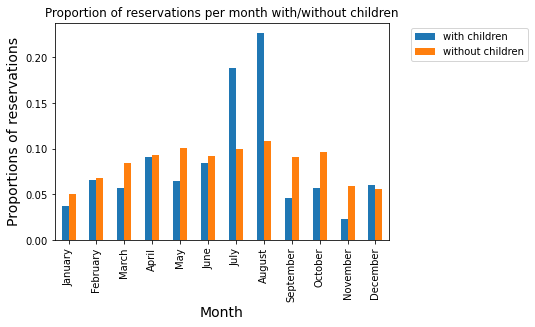

In [13]:
x=df.query("children == 0").shape[0]
print(x)
y=df.query("children > 0").shape[0]
print(y)

df_nochildren = df.query("children == 0").groupby(['arrival_date_month']).count()['hotel']/x
df_children = df.query("children > 0").groupby(['arrival_date_month']).count()['hotel']/y
df_tmp = pd.merge(df_children, df_nochildren, on='arrival_date_month')

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_tmp = df_tmp.reindex(new_order, axis=0)

df_tmp.plot.bar();
plt.ylabel('Proportions of reservations', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.title("Proportion of reservations per month with/without children");
plt.legend( ["with children","without children"], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



We can observe that reservations with children are much more likely to be made for August and July which corresponds to school
holidays comparing to the reservations without children. The number of reservations without children is spread more evenly across the year.

### How long in advance to book in order to get a good rate ?

In [14]:
# add new column lead_time_weeks created based on lead_time divided by 7 days,
#and if number of days is >52 then repalce the number with 52 (1 year)

df['lead_time_weeks']=(df['lead_time']/7+1).astype(int)
df['lead_time_weeks']=df.apply(lambda x: x['lead_time_weeks'] if (x['lead_time_weeks']<52) else 52, axis=1)

df.head()



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stay_in_nights,lead_time_weeks
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,49
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,52
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,3


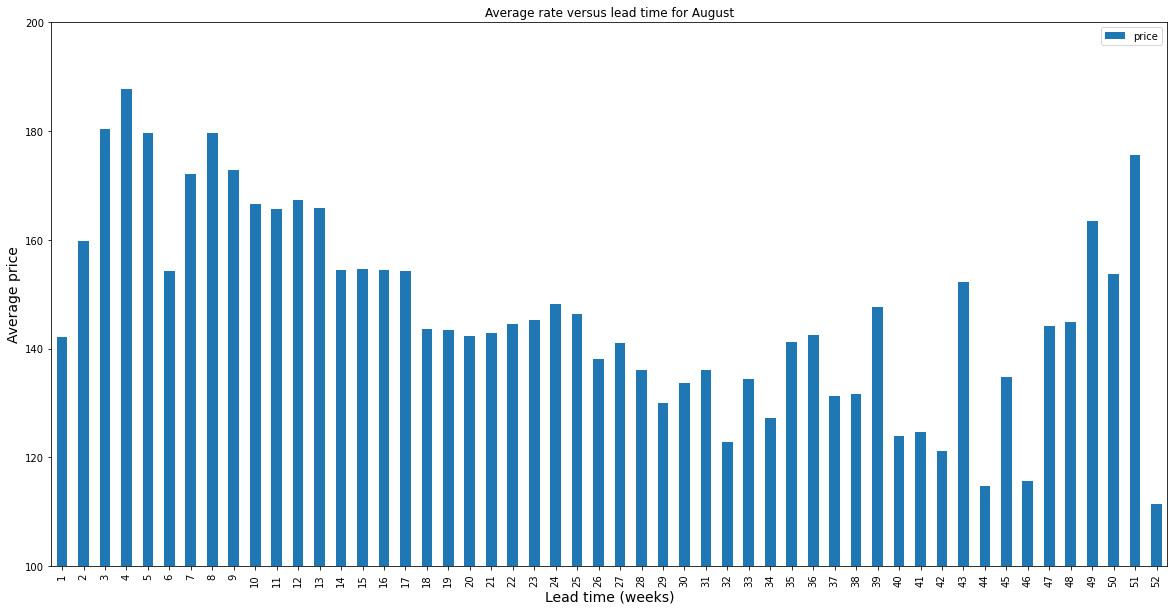

In [15]:
# below shows the average rate versus lead time  in weeks , for month August

pd.set_option('display.max_rows', None)
df_segments = df.query('market_segment == "Online TA" or market_segment == "Offline TA/TO"  or market_segment == "Direct"', engine='python')
df_segments.query('arrival_date_month == "August"', engine='python').groupby(['lead_time_weeks']).mean().sort_values(['lead_time_weeks', 'adr'],ascending = [True, False])[['adr']].plot(kind='bar',ylim=(100,200),figsize=(20, 10));

plt.ylabel('Average price', fontsize=14)
plt.xlabel('Lead time (weeks)', fontsize=14)
plt.legend( ["price"])
plt.title("Average rate versus lead time for August");
plt.show()


We can observe that based on this dataset to book 4 weeks in advance ends up with the highest rate.

### Does deposit type affect the rate for Online booking?

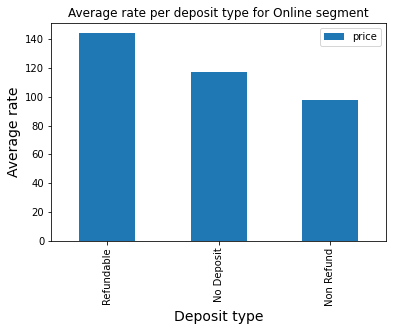

In [16]:
df.query('market_segment == "Online TA"', engine='python').groupby(['deposit_type']).mean()['adr'].sort_values(ascending=False).plot(kind='bar', stacked=True);

plt.ylabel('Average rate', fontsize=14)
plt.xlabel('Deposit type', fontsize=14)
plt.title("Average rate per deposit type for Online segment");
plt.legend(["price"])
plt.show()



As we expected the average rate for Non Refundable booking has the cheapest rate, for online booking


###  Does market segment type affect the rate?

In [17]:
# market_segment, which segment has the cheapest average rate
df.market_segment.unique()


array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Groups'],
      dtype=object)

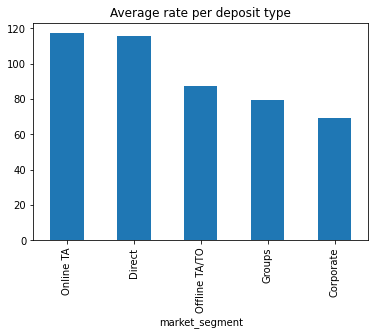

In [18]:
df.groupby(['market_segment']).mean()['adr'].sort_values(ascending=False).plot(kind='bar', stacked=True);
plt.title("Average rate per deposit type");


Corporate and groups booking looks like the cheapest, while booking via online travel agent comes to be the most expensive

### Other obeservations

In [19]:
# number of cancellation per month, which month is more likely to have most of cancellation, does it depend on nr of bookings
df.groupby(['arrival_date_month'])['is_canceled'].mean().sort_values(ascending=False) 
df.groupby(['arrival_date_month'])['hotel'].count().sort_values(ascending=False) 


arrival_date_month
August       13816
July         12609
May          11669
October      11054
April        10992
June         10832
September    10429
March         9712
February      8014
November      6710
December      6689
January       5866
Name: hotel, dtype: int64

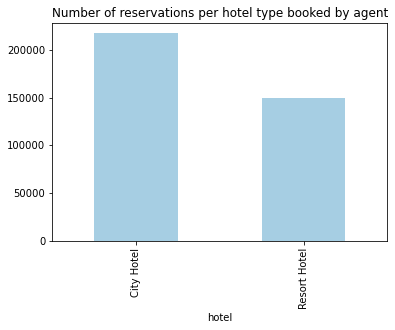

In [20]:
# Agent is booking more City type of hotel
df.query('agent.notnull()', engine='python').groupby(['hotel']).sum()['stay_in_nights'].sort_values(ascending=False).plot(kind='bar', stacked=True, colormap='Paired');
plt.title("Number of reservations per hotel type booked by agent");



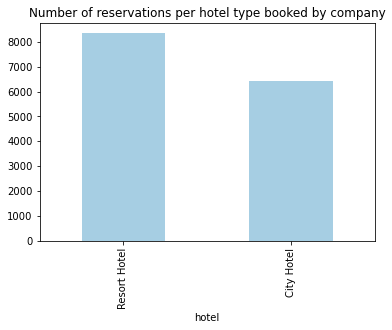

In [21]:
# Company is booking more Resort type of hotel
df.query('company.notnull()', engine='python').groupby(['hotel']).sum()['stay_in_nights'].sort_values(ascending=False).plot(kind='bar', stacked=True, colormap='Paired');
plt.title("Number of reservations per hotel type booked by company");